In [463]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import widgets
import random

In [464]:
def initialCentroid(data, k):
    centroids = random.sample(data,k)
    return centroids

def EuclideanDist(x, centroid):
    return (x[0]-centroid[0])**2 + (x[1]-centroid[1])**2

def findBestCentroid(x, centroids):
    bestIdx = 0
    initialDist = EuclideanDist(x, centroids[0])
    for idx in range(len(centroids[1:])):
        temp_dist = EuclideanDist(x, centroids[idx+1])
        if temp_dist < initialDist:
            bestIdx = idx+1
    return bestIdx

def clustering(data, centroid):
    cluster = []
    for x in data:
        x_cluster = findBestCentroid(x, centroid)
        cluster.append(x_cluster)
    return cluster

def newCentroid(data, cluster):
    numOfCluster = (np.unique(cluster))
    newCentroids = []
    for i in numOfCluster:
        temp = []
        for x, clus in zip(data, cluster):
            if clus==int(i):
                temp.append(x)
        newCentroids.append(np.array(temp).mean(axis=0))
    return newCentroids
            
def converged(old, new):
    converge = False
    if (all(np.unique(old[0])==np.unique(new[0]))) & \
            (all(np.unique(old[1])==np.unique(new[1]))):
        converge = True
    return converge 


In [465]:
np.array(raw_data).min()

-1.3999999999999999

In [487]:
raw_data = [[0,1], [3.1,4], [2.2,3], [1,1], [6.7, 7], [6, 8.6], [5, 6.5], [7.3, 9.8],
            [3,2], [5,7.5], [0,1.3],[0,3], [1,2], [0,0], [0,4], [0.2, 0.9], [0.5, 0.5], [0, -1.4], [4, 3],
       [3,2], [2,2], [4.8,6], [3.5, 3.2], [0.2, 5], [0.7,2], [4, 0.2], [3,-1], [8.4, 7.3],
            [2,5.4], [3.7,4.1], [1,5], [2.1, 5.7], [3.6, 4.5], [5.2, 10.5], 
            [8.8,5.2],[8.5, 6.2], [7.4, 8.7], [10, 9.5], [10.4, 9.9]]
limitMax = np.array(raw_data).max() + 1
limitMin = np.array(raw_data).min() - 1
data = {}
for i, item in enumerate(raw_data):
    item = str(item)
    data[item]=i

In [488]:
first = widgets.Dropdown(
    options= data,
    value = 0,
    description='initial Centroid1:',
    disabled=False
)
second = widgets.Dropdown(
    options=data,
    value = 1,
    description='initial Centroid2:',
    disabled=False,
)

In [489]:
def plot_kmeans(n, centroid1, centroid2): 
    #이상치에 초기 중심점으로 선택되는 경우 
    centroid = [raw_data[int(centroid1)], raw_data[int(centroid2)]]
    num = 0
    if num == n :
        plt.figure(figsize=(8, 8), dpi=100)
 
        for x  in raw_data:
            plt.scatter(x[0], x[1], color="grey", alpha=0.7, marker="o")
            plt.scatter(x[0], x[1], color="grey", alpha=0.02, s=50000)
        for i in centroid:
            plt.scatter(i[0], i[1], color="yellow", marker=r"$\star$", s=1000)
        plt.xlim([limitMin,limitMax])
        plt.ylim([limitMin,limitMax])
        plt.show()
    
    else:
        while (num < n):
            clusterIdx = clustering(raw_data, centroid)
            newCent = newCentroid(raw_data, clusterIdx)
        
            num+=1
            if converged(centroid, newCent):
                print("                                           찾았다!")
                break
        
            centroid = newCent
         
        plt.figure(figsize=(8, 8), dpi=100)
        cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    
        for x, clusterIdx in zip(raw_data, clusterIdx):
            if clusterIdx == 0:
                plt.scatter(x[0], x[1], color="dodgerblue", alpha=0.7, marker="o")
                plt.scatter(x[0], x[1], color="dodgerblue", alpha=0.02, s=50000)
            else:
                plt.scatter(x[0], x[1], color="red", alpha=0.7, marker="o")
                plt.scatter(x[0], x[1], color="red", alpha=0.02, s=50000, )
            
        for i in centroid:
            plt.scatter(i[0], i[1], color="yellow", marker=r"$\star$", s=1000)
        plt.xlim([limitMin,limitMax])
        plt.ylim([limitMin,limitMax])
        plt.show()

#   

###  

# <b>Clustering</b>
<br>
#### 구분하려고 하는 각 class에 대한 아무런 지식이 없는 상태에서 분류 (classify) 하는 것이므로 자율학습 (Unsupervised Learning) 에 해당한다. 즉 sample 들에 대한 지식없이 similarity (유사도) 에 근거하여 cluster 들을 구분한다. 패턴 공간에 주어진 유한 개의 패턴들이 서로 가깝게 모여서 무리를 이루고 있는 패턴 집합을 cluster (군집) 이라하고 무리지워 나가는 처리 과정을 clustering 이라 한다. 

## <b>Kmeans Clustering</b>


#### 1) 클러스터의 개수를 정한다.
#### 2) 랜덤하게 초기 중심점을 잡는다.
#### 3) for문을 돌면서 모든 데이터에 대해서 가장 가까운 중심점을 찾는다. 
#### 4) 같은 중심점을 갖는 데이터들을 하나의 클러스터로 묶는다. 
#### 5) 각 클러스터마다 중심점을 계산해서 업데이트한다. (평균 사용)
#### 6) 클러스터의 중심점이 바뀌지 않을때까지 3,4,5번을 반복한다.

In [490]:
widgets.interact(plot_kmeans, n=widgets.IntSlider(min=0,max=30,step=1,value=0,),
                centroid1 = first, centroid2 = second);

A Jupyter Widget

##   

### <b>Kmean clustering의 최대 단점은 초기 중심점이 랜덤하게 결정된다는 것임!!! </b>
#### 또한 이상치의 영향을 많이 받고, 초기 중심점이 가까운 거리에 있는 경우 좋지 않다는 단점이 있음.</br><br>
#### <b>해결 방법</b>
#### Kmeans 알고리즘을 여러번 돌려서 SSE가 가장 좋은 경우를 선택하는 방법
#### 변형 알고리즘을 사용

####  

### <b>Kmeans++</b> :  초기의 중심점을 가능하면 멀리두게 하는 알고리즘을 사용<br>

#### 1. 첫번째 중심점 c(1)을 랜덤하게 선택한다. 
#### 2. 중심점을 제외한 모든 데이터에 대해서 가장 가까운 중심점과의 거리 D(x)를 계산한다.
#### 3. 아래의 확률을 토대로 가중확률을 이용해서 새로운 센터 c(i)를 랜덤하게 선택한다. 
#### 4.. k개의 중심점을 찾을때까지 2번을 반복한다.
#### 5. 다음부터는 Kmeans 알고리즘과 똑같다. 

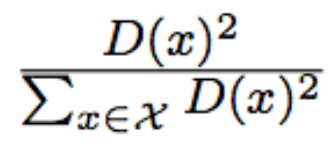

####  

### <b>DBSCAN 클러스터링 </b> 이상치가 있거나, 구형 클러스터링을 할 때 좋은 성능을 발휘


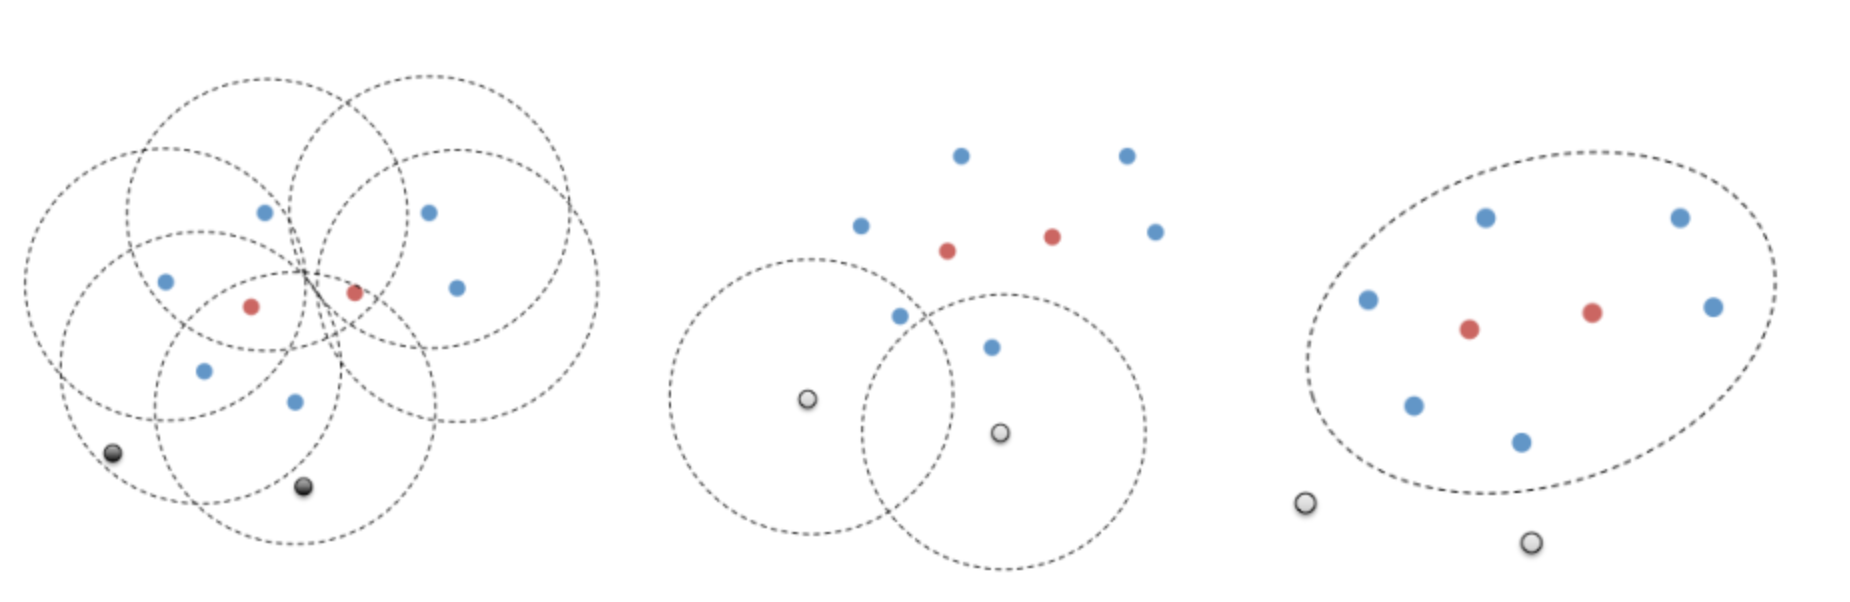

#### n=5 
#### 빨간점은 반지름내에 5개의 이웃벡터를 갖기 때문에 핵심벡터이다.
#### 파란점은 이웃벡터의 수가 5개 미만으로 핵심벡터는 아니지만 핵심벡터의 이웃 벡터이기 때문에 핵심벡터와 같은 군집의 외곽벡터를 형성한다.
#### 회색점들은 이웃벡터의 수가 5개 미만이고 이웃벡터에 핵심벡터가 없으므로 어떠한 군집에도 포함되지 않고 노이즈로 분류한다.

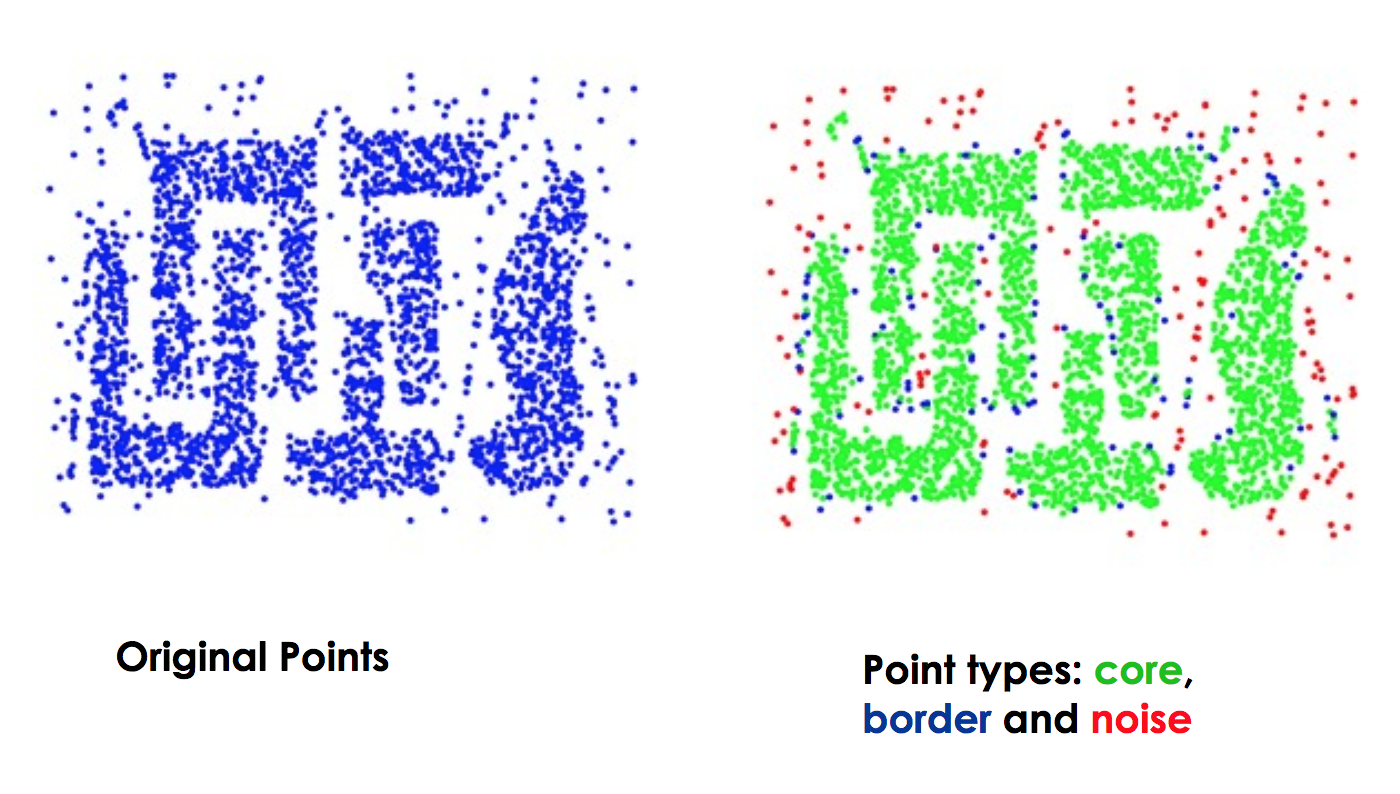

####    

### <b>EM Clustering </b> (Expectation Maximization)


#### Kmeans 클러스터링과 비슷함. 
#### Kmeans clustering에서는 하나의 데이터가 하나의 클러스터에 속하게 됨! 
#### EM clustering에서는 해당 클러스터에 데이터가 나타날 확률로 표현함! 

####    

### <b>클러스터의 수를 구할때 사용하는 방법</b>

#### <b>Rule of Thumb</b>
#### 클러스터의 개수를 n/2에 루트를 취한값으로 정하는 방법

#### <b> Elbow method</b>
#### 클러스터의 수를 순차적으로 늘려가면서 결과를 모니터링을 함. 하나의 클러스터를 추가했을 때 이전보다 훨씬 더 나은 결과를 나타내지 않는다면, 이전의 클러스터의 수를 구하고자 하는 클러스터의 수로 설정

#### 1. 클러스터의 개수를 바꿔가면서 클러스터링을 실행한다.

#### 2. 각 클러스터 개수에 대해,  클러스터 내의 SSE의 합을 계산한다.

#### 3. plot을 띄우고, 급격하게 꺾이는 부분을 적절한 클러스터 개수로 고려한다.


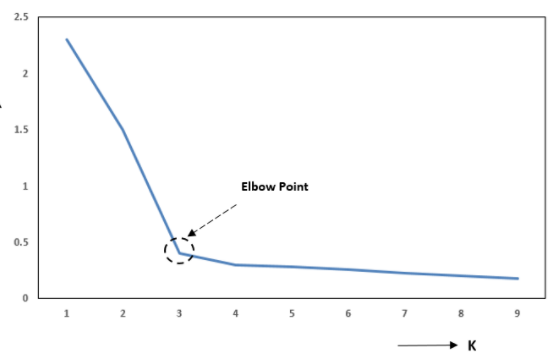

###  

###  

###  

# <b>Hierarchical Clustering </b>

#### - 클러스터의 개수를 정해주지 않아도 된다! 
#### - 덴드로그램을 이용해서 적절한 수준에서 잘라주면 된다! 
####   
#### <b>Agglomerative Clustering</b>
#### 1) 모든 데이터 사이의 거리 또는 유사도를 구해준다.
#### 2) 가장 가까운 데이터들부터 클러스터로 묶는다. 
#### 3) 하나의 클러스터가 남을때가지 이 과정을 반복한다.
####   
#### <b>Divisive Clustering </b>
#### 1) 위와 반대로 전체 데이터에서 시작해서 각각의 데이터가 하나의 클러스터가 될 때까지 나누는 방법
#### 2) DIANA 방법을 이용한다. ( 많이 사용되지는 않음 )

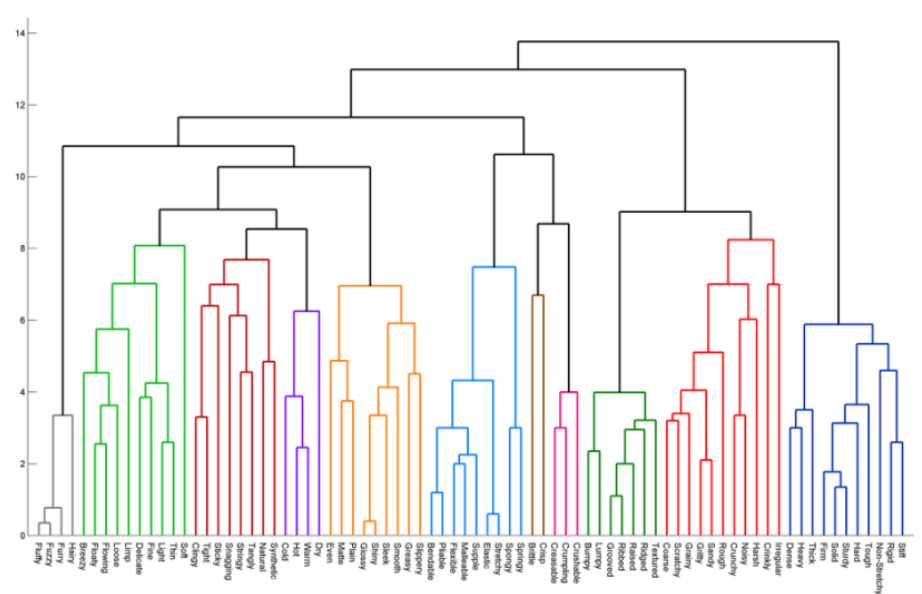

####    

### <b>거리와 유사도</b>
#### 데이터 사이의 거리 계산을 위해 distance 또는 similarity를 사용한다. ( 구글링 하면 공식은 다 나옴 ㅎㅎ)

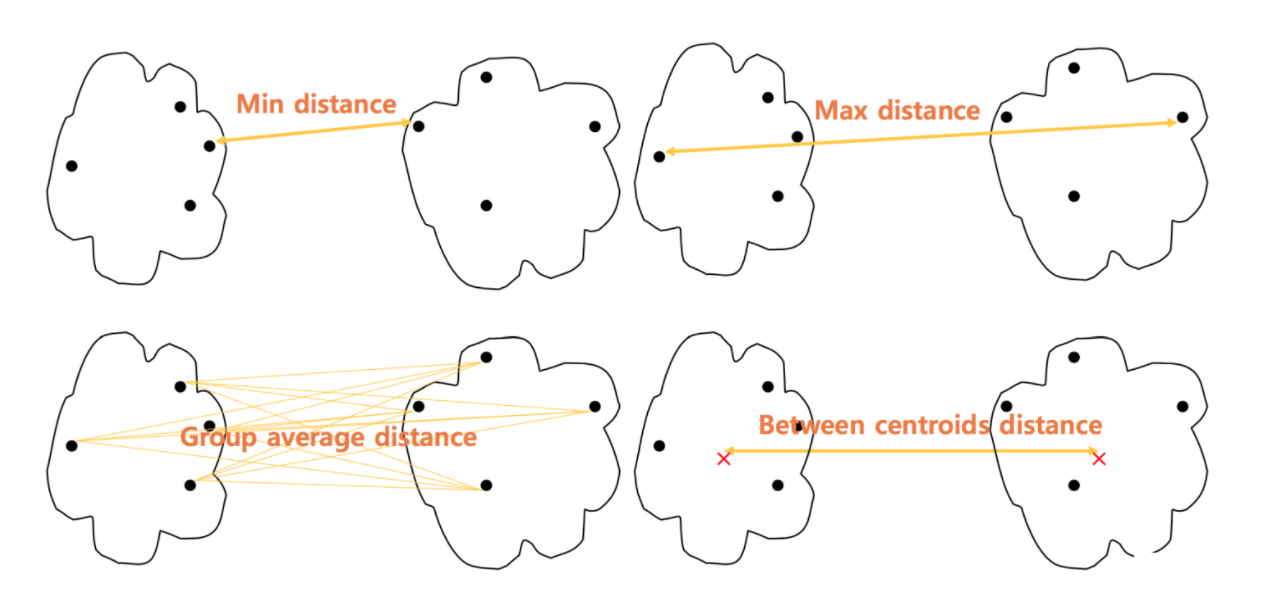

### linkage는 두 클러스터 사이의 거리를 어떻게 정의할까에 대한 부분! <br>
#### - <b>single linkage</b>는 두 클러스터의 모든 조합에 대해 거리가 가장 작은 값을 선택 
#### - <b>complete linkage</b>는 두 클러스터의 모든 조합에 대해 거리가 가장 큰 값을 선택 
#### - <b>average linkage</b>는 두 클러스터의 모든 조합에 대해 거리의 평균값을 계산
#### - <b>centroid linkage</b>는 두 클러스터의 중심점을 정하고 그 사이의 거리를 계산

## <b>ward linkage</b> (method using variance)
#### - ward linkage는 두 클러스터의 유사성을 두 군집이 합쳐졌을 때의 오차 제곱합의 증가분에 기반해서 계산. 
#### - 병합으로 인한 SSE의 증가분(정보의 손실)이 최소가 되도록 클러스터를 합침
#### - single linkage가 이상치에 민감한 반면, ward linkage는 이상치에 덜 민감한 장점이 있다. 
#### - centroid linkage와 계산 수식이 비슷한데, ward linkage에는 가중값이 추가되었다는 점이 다르다.

####  

####  

###  

### <b>거리행렬을 이용해서 덴드로그램 그리기</b>

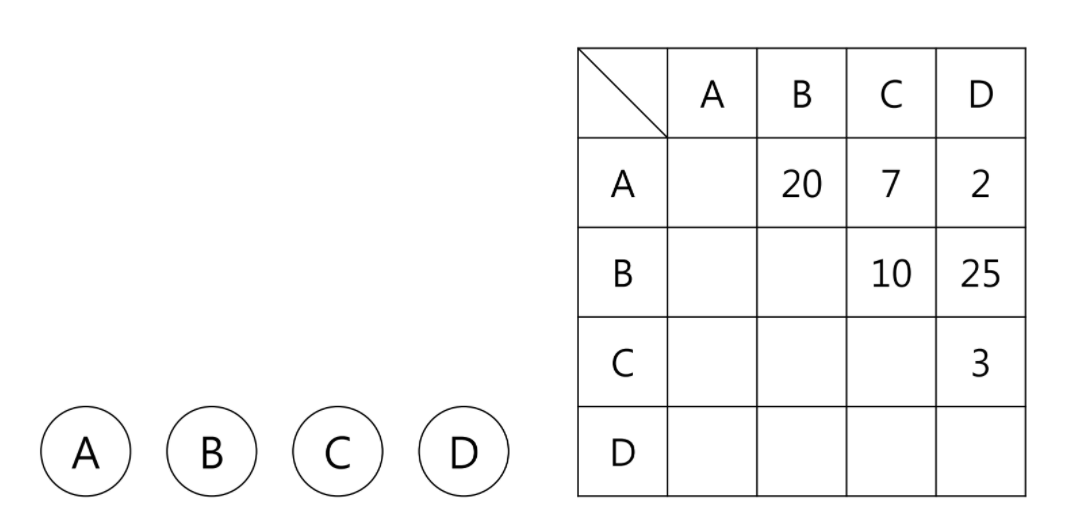

A, B, C, D 네 개의 데이터에 대해서 거리행렬 이렇다고 가정한다 

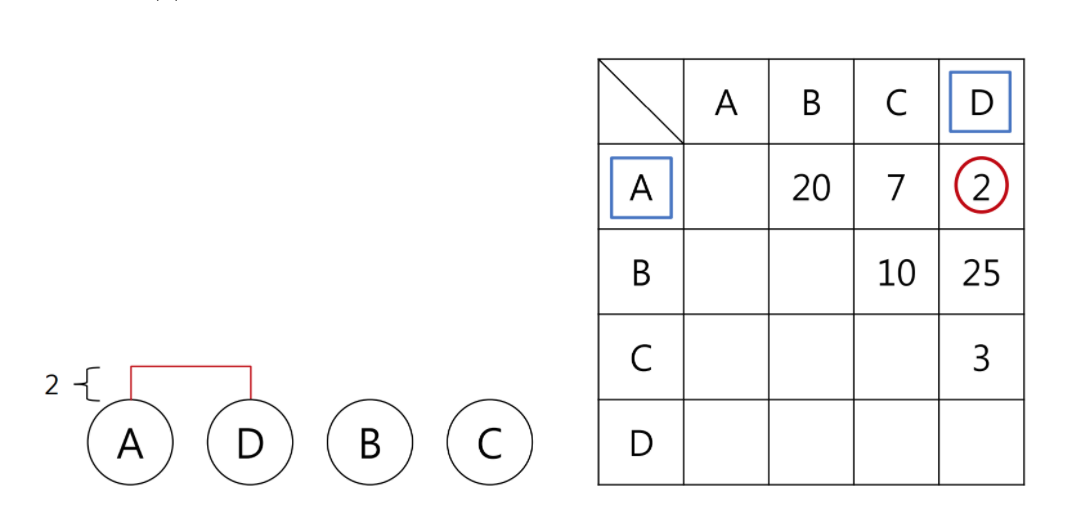

전체 중에서 거리가 가장 가까운 데이터부터 차례대로 군집으로 묶는다. (A, D)의 거리가 2로 가장 짧기 때문에 클러스터로 묶어준다. 왼쪽에 있는 덴드로그램에서 2라는 것은 덴드로그램의 높이가 2가 된다는 것이다. 

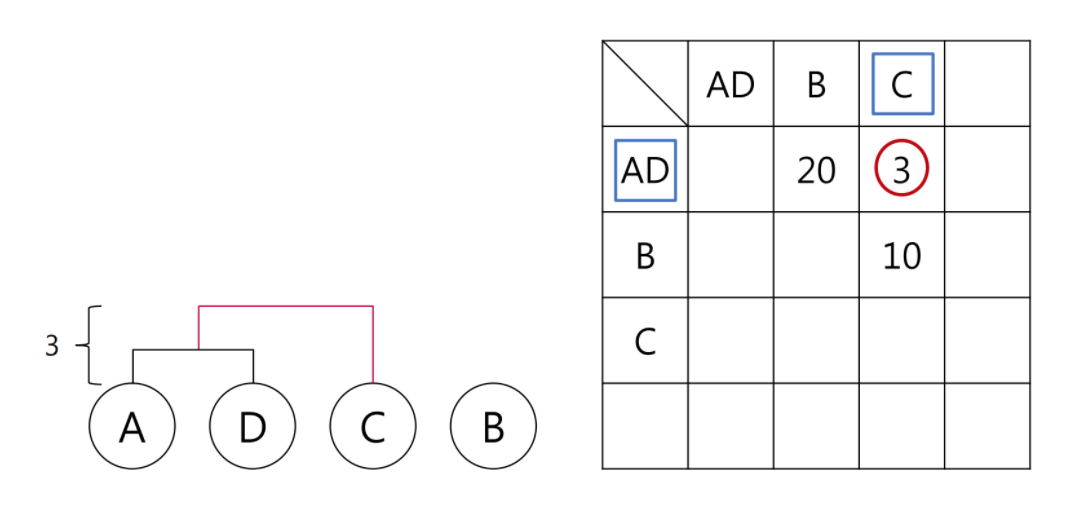

이제 남은 클러스터는 (A,D), C, B 세 개가 남았으므로 3개의 클러스터에 대해 또 다시 거리행렬을 계산한다. 그리고 확인하면 (A,D)와 C가 가장 가까운 거리에 있으므로 하나의 클러스터로 묶어준다. 여기서의 덴드로그램의 높이는 3이다.

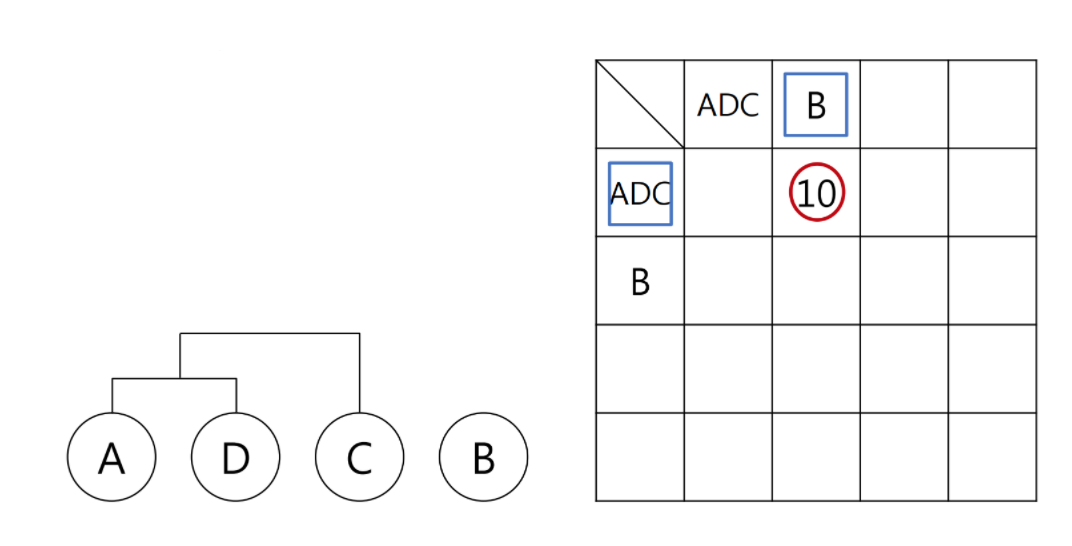

또다시 새롭게 거리행렬을 계산하고 남은 클러스터를 묶어주면 하나의 클러스터로 모든 데이터가 묶이게된다. 여기서 덴드로그램의 높이는 10이된다. 

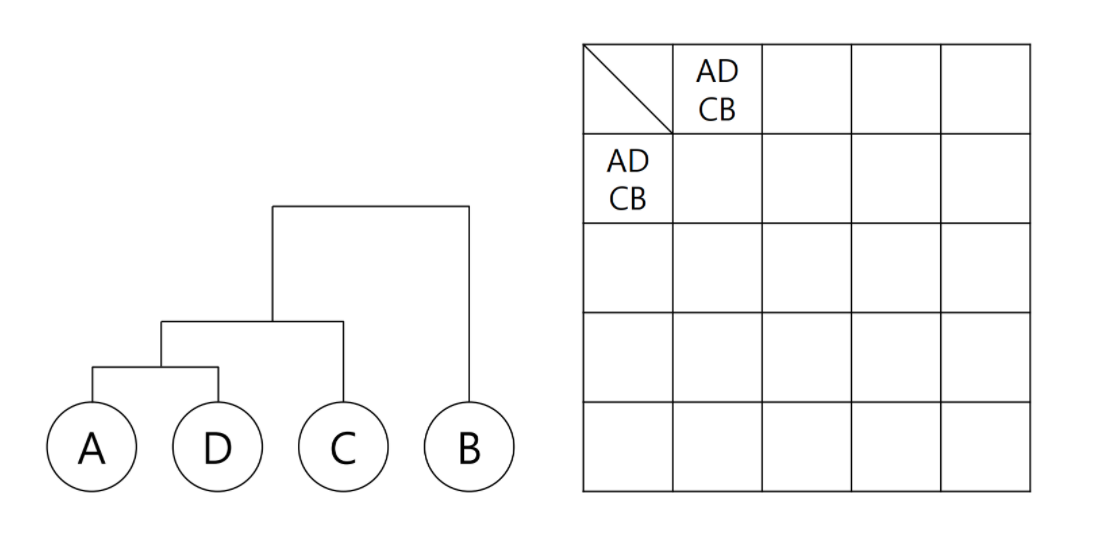

더 이상 분석 대상 관측치가 없으면 클러스터링이 종료된다. 

###   

###   

#####   

# <b>클러스터 평가</b>
#### 어떻게 클러스터링 결과를 평가할 것인가?!?!

### <b>실루엣 평가</b> 
#### 하나의 데이터 i 에 대해
#### - <b>a(i)</b>는 클러스터 내의 응집도(Cohesion), 데이터 x(i)와 동일한 클러스터내의 나머지 데이터들과의 평균거리. 
#### - <b>b(i)</b>는 클러스터간 분리도(Separtion). 데이터 x(i)와 가장 가까운 클러스터내의 모든 데이터들과의 평균거리 <br>
####  클러스터 개수가 최적화 되어 있다면 b(i)의 값은 크고, a(i)의 값은 작아지고 s(i)의 값은 1에 가까운 숫자가 된다.
#### 실루엣 계수가 0이면 데이터들을 클러스터로 분리하는 것이 무의미하다는 것 !
#### 실루엣 계수가 마이너스이면 그냥 잘못 나눈거 ! 

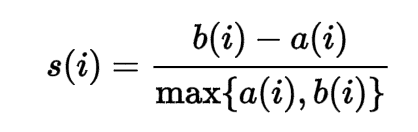

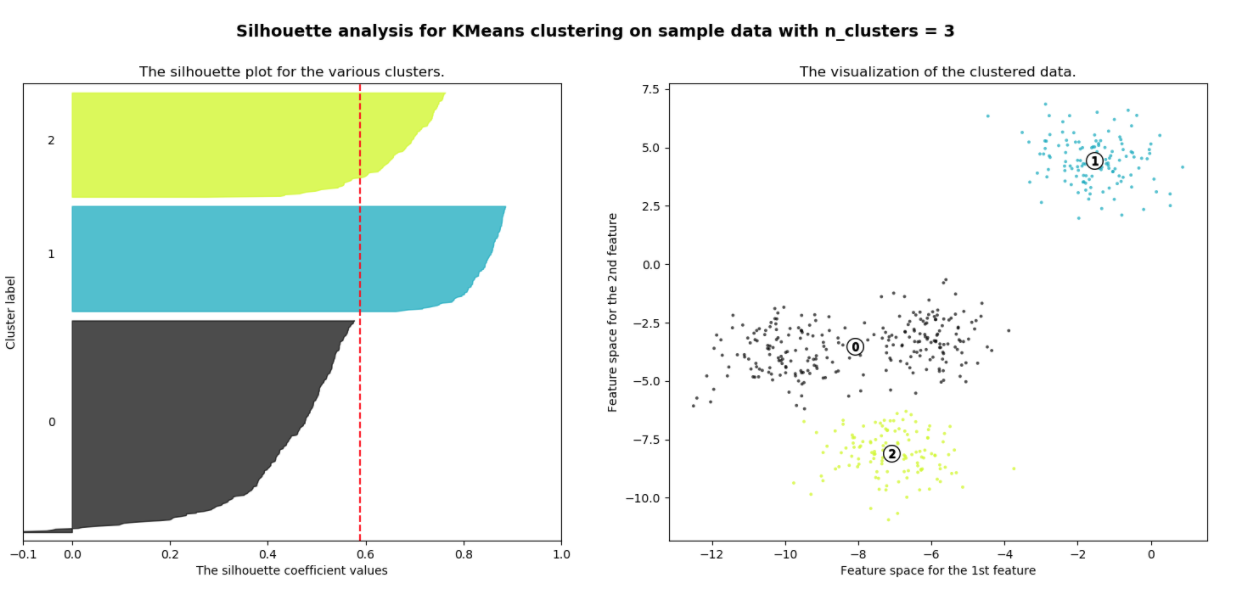

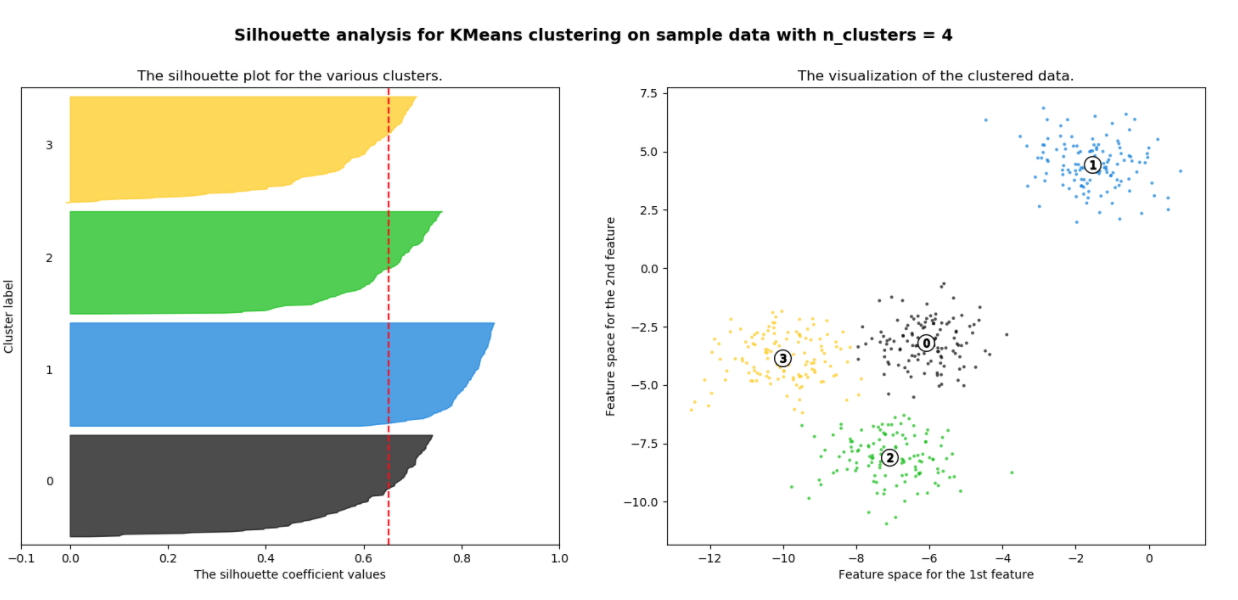

###   

### <b> 유사도 행렬을 이용한 평가</b>

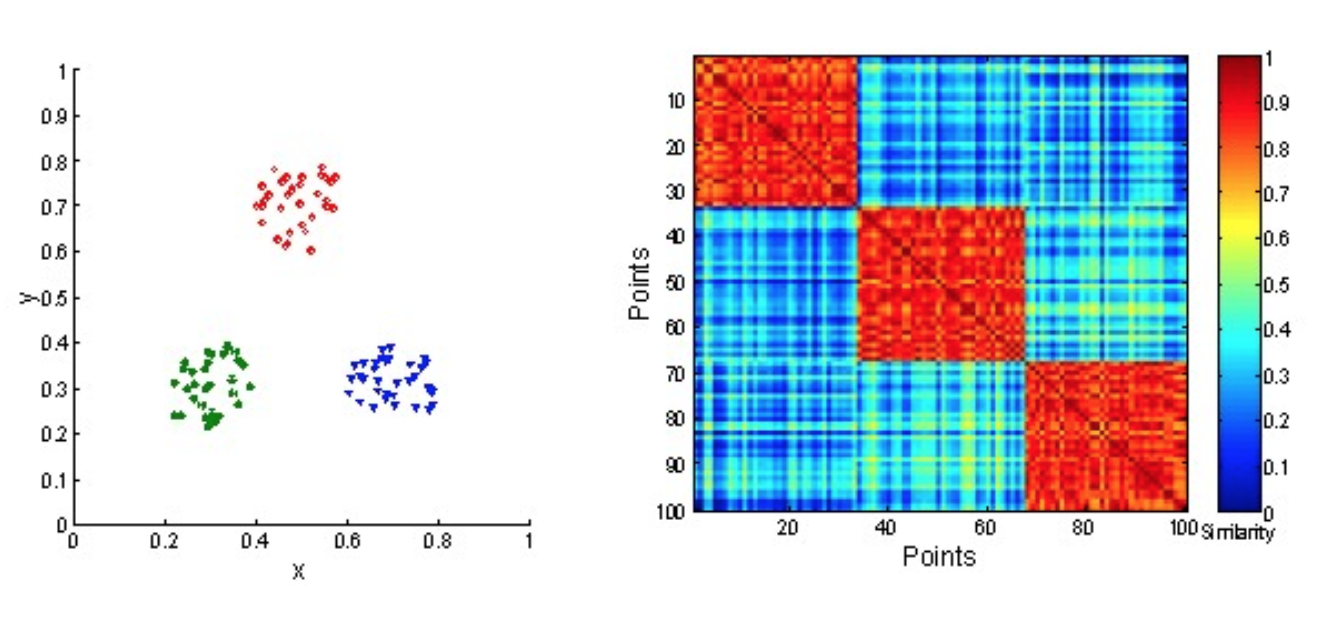

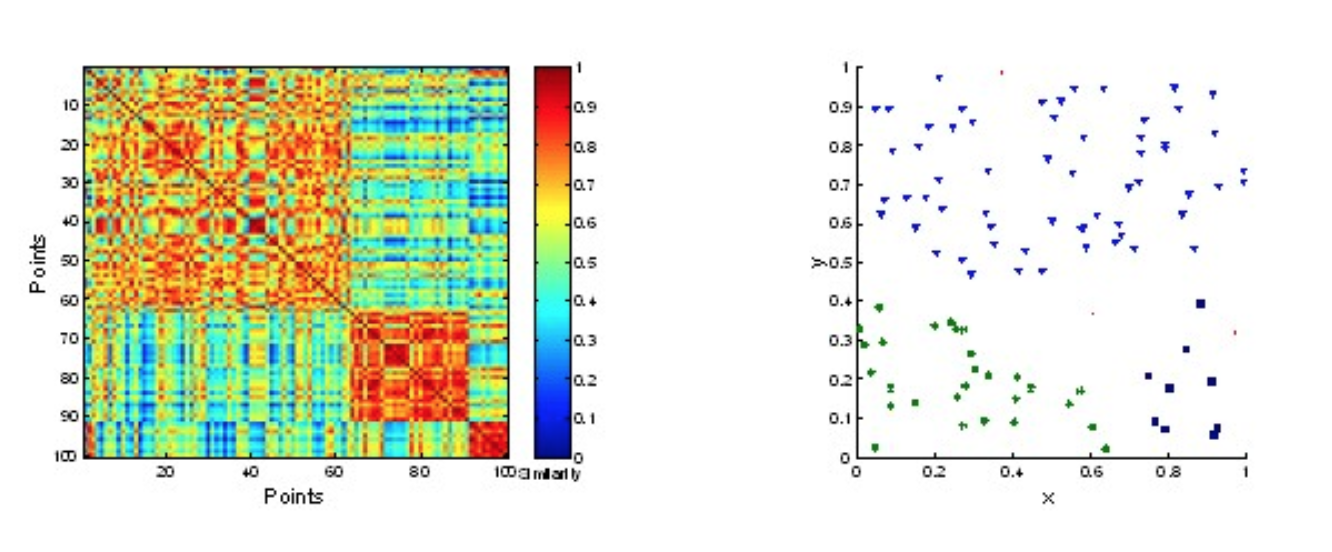

###   

### <b>상관계수를 이용한 평가</b><br>

#### 2개의 matrix가 필요한데 1개는 distance matrix 
#### 다른 하나는 incidence matrix ! 
#### incidence matrix는 두 데이터가 같은 클러스터에 속하면 1, 다른 클러스터에 속하면 0을 값으로 가지는 matrix !
#### 이 두 개의 matrix를 가지고 상관계수를 구하면 됩니다. 
#### 상관계수가 높으면 같은 클러스터에 속한 데이터가 가까이 위치해 있다는 것을 의미한다.


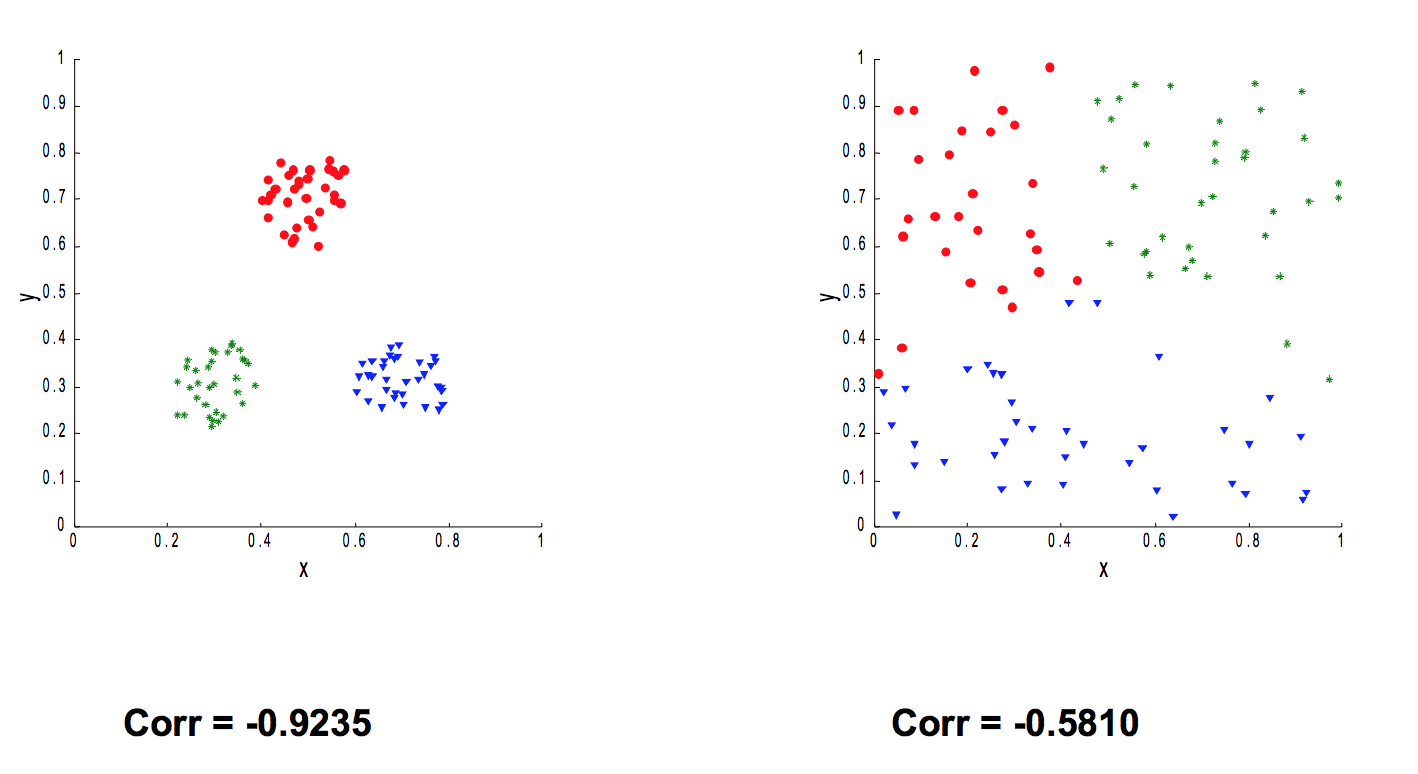

###   

### <b>Clustering cross-validation</b><br>
#### 데이터를 랜덤하게 2개로 나누고, 각각 클러스터링을 실행한 후, 결과가 비슷하다면 안정성이 있다고 볼 수 있음


###   

### <b>외부 평가</b><br>
#### 클러스터링의 결과는 클러스터링에 사용되지 않은 데이터로 평가된다. 다시 말해, 클러스터링의 결과물을 전문가들이 미리 정해높은 모범답안 혹은 외부 벤치마크 평가 기준 등을 이용해서 클러스터링 알고리즘의 정확도를 평가하는 것임. 이러한 평가 방식은 클러스터링 결과가 미리 정해진 결과물과 얼마나 비슷한지를 측정하는 것임. Rand measure, F-measure, Jaccard Index 같은 방법을 사용 

###   

###   

### <b> Reference </b>

#### Kmeans : https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98
#### DBSCAN : http://gentlej90.tistory.com/29
#### 클러스터링평가 : http://slideplayer.com/slide/4706520/
#### Hierarchical clustering : https://ratsgo.github.io/machine%20learning/2017/04/18/HC/
#### Linkage : http://rfriend.tistory.com/227
#### Ward Linkage : http://elearning.kocw.net/document/lec/2012/DukSung/KimJaehee/14.pdf

In [495]:
import numpy as np

X = ['HTTTHHTHTH','HHHHTHHHHH','HTHHHHHTHH','HTHTTTHHTT','THHHTHHHTH']

def EM_step(ThetaA, ThetaB):
    Maximization_step = []

    for i in X:
        H = 0
        T = 0
        for j in i:
            if j == 'H':
                H += 1
            else: T += 1 # 각각에서 H와 T의 개수를 카운트하고  
        BernA = (ThetaA**H)*((1-ThetaA)**T) # 0.6이라는 초기값을 이용해서 BernA의 값을 구함 
        BernB = (ThetaB**H)*((1-ThetaB)**T) # 0.5이라는 초기값을 이용해서 BernB의 값을 구함 
        BernA_propor = BernA/(BernA+BernB)
        BernB_propor = BernB/(BernA+BernB)
        print(BernA_propor, BernB_propor)
        Maxi_Bern_propor = [BernA_propor*H, BernA_propor*T, BernB_propor*H, BernB_propor*T]
        #rint Maxi_BernA_propor, Maxi_BernB_propor
        Maximization_step.append(Maxi_Bern_propor)

    CoinAH, CoinAT, CoinBH, CoinBT = np.sum(np.array(Maximization_step), axis=0)
    Predict_theta_A = CoinAH / (CoinAH + CoinAT)
    Predict_theta_B = CoinBH / (CoinBH + CoinBT)

    return Predict_theta_A, Predict_theta_B

ThetaA = 0.6
ThetaB = 0.5

for i in range(15):
    ThetaA, ThetaB = EM_step(ThetaA, ThetaB)
#    print (round(ThetaA,3), round(ThetaB,3))

0.44914892610093643 0.5508510738990636
0.804985517232276 0.19501448276772407
0.7334671580091432 0.26653284199085686
0.3521561338462594 0.6478438661537407
0.6472151158991253 0.3527848841008746
0.295819324763 0.704180675237
0.81151044718 0.18848955282
0.706422011746 0.293577988254
0.190144538621 0.809855461379
0.573533931883 0.426466068117
0.21759231677 0.78240768323
0.869848521755 0.130151478245
0.751154079977 0.248845920023
0.111590591627 0.888409408373
0.57686907319 0.42313092681
0.161702613716 0.838297386284
0.912904932003 0.0870950679967
0.79426367577 0.20573632423
0.0663334323495 0.933666567651
0.587104611522 0.412895388478
0.129020338039 0.870979661961
0.935378351785 0.0646216482147
0.821550693854 0.178449306146
0.0449951751354 0.955004824865
0.594205062309 0.405794937691
0.113542152856 0.886457847144
0.945279679991 0.0547203200092
0.835231770078 0.164768229922
0.0362240460865 0.963775953914
0.59798905874 0.40201094126
0.107088090468 0.892911909532
0.949335754939 0.0506642450605
0